#Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy.stats import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, roc_curve, cohen_kappa_score, f1_score
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
plt.rc('font', size=15)

# Importing Input Datasets

The headers aren't available in the Input Datasets, so we have to provide them manually.

In [5]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root",
 "num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", 
 "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate",
 "dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [6]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3. Network Intrusion Detection System/Train.txt',header=None, names=columns)

In [7]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3. Network Intrusion Detection System/Test.txt', header=None, names=columns)

# Data Inspection

In [8]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
train.shape

(125973, 43)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


### Composition of the Dependent variable

In [9]:
train.attack.value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [ ]:
print('"attack" is our dependent variable and It contains',len(train.attack.value_counts()),'categories')

"attack" is our dependent variable and It contains 23 categories


## Duplicate Value Inspection

In [8]:
train.duplicated().sum()

0

## Missing value Inspection

In [9]:
train.isna().sum().sum()

0

In [10]:
test.isna().sum().sum()

0

## Separating Numerical and Categorical Variables

In [10]:
num_cols = train[train.columns.difference(['attack'])].select_dtypes(include=['int32','int64','float32','float64']).columns

In [11]:
cat_cols = train[train.columns.difference(['attack'])].select_dtypes(include=['object']).columns

## Data Audit Reports

#### UDF to get Data Audit Report for Continuous Variables

In [ ]:
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

#### UDF to get Data Audit Report for Categorical Variables

In [ ]:
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [ ]:
train[num_cols].apply(continuous_var_summary)

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,duration,hot,is_guest_login,is_host_login,land,last_flag,logged_in,num_access_files,num_compromised,num_failed_logins,num_file_creations,num_outbound_cmds,num_root,num_shells,rerror_rate,root_shell,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment
N,1.259730e+05,125973.000000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,1.259730e+05,125973.000000,125973.000000,125973.000000,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
NMISS,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SUM,1.059528e+07,7942.930000,2.491634e+09,2.294585e+07,10449.600000,14969.600000,18691.730000,65662.380000,35833.330000,1.456916e+07,4099.470000,15146.980000,35081.530000,3.617247e+07,25750.000000,1187.000000,1.000000,25.000000,2.456985e+06,49852.000000,516.000000,35178.000000,154.000000,1596.000000,0.0,38068.000000,52.000000,15111.530000,169.000000,83259.040000,35837.370000,5.740179e+09,3.494225e+06,12259.900000,15265.820000,35585.530000,139.000000,14.000000,2858.000000
MEAN,8.410755e+01,0.063053,1.977911e+04,1.821489e+02,0.082951,0.118832,0.148379,0.521242,0.284452,1.156530e+02,0.032542,0.120240,0.278485,2.871447e+02,0.204409,0.009423,0.000008,0.000198,1.950406e+01,0.395736,0.004096,0.279250,0.001222,0.012669,0.0,0.302192,0.000413,0.119958,0.001342,0.660928,0.284485,4.556674e+04,2.773789e+01,0.097322,0.121183,0.282485,0.001103,0.000111,0.022687
MEDIAN,1.400000e+01,0.000000,0.000000e+00,2.550000e+02,0.020000,0.000000,0.000000,0.510000,0.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400000e+01,8.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
STD,1.145086e+02,0.180314,4.021269e+06,9.920621e+01,0.188922,0.306557,0.308997,0.448949,0.444784,1.107027e+02,0.112564,0.319459,0.445669,2.604515e+03,2.149968,0.096612,0.002817,0.014086,2.291503e+00,0.489010,0.099370,23.942042,0.045239,0.483935,0.0,24.399618,0.022181,0.320436,0.036603,0.439623,0.446456,5.870331e+06,7.263584e+01,0.259830,0.323647,0.447022,0.045154,0.014366,0.253530
VAR,1.311222e+04,0.032513,1.617061e+13,9.841873e+03,0.035691,0.093977,0.095479,0.201556,0.197833,1.225510e+04,0.012671,0.102054,0.198621,6.783500e+06,4.622364,0.009334,0.000008,0.000198,5.250986e+00,0.239131,0.009874,573.221387,0.002047,0.234193,0.0,595.341363,0.000492,0.102679,0.001340,0.193268,0.199323,3.446079e+13,5.275965e+03,0.067512,0.104748,0.199829,0.002039,0.000206,0.064277
MIN,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
P1,1.000000e+00,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,

In [ ]:
train[cat_cols].apply(categorical_var_summary)

,flag,protocol_type,service
N,125973,125973,125973
NMISS,0,0,0
MODE,SF,tcp,http
FREQ,74945,102689,40338
PERCENT,59.49,81.52,32.02


# Data Preparation

#### Creating a copy of Dataframes before making changes

In [12]:
train1 = train.copy()

In [13]:
test1 = test.copy()

## Derive Variable Creation

### Deriving Dependent Variable for Binary and Multi-Class Problem

### For Binary Data

In [14]:
train1['binary_labels'] = ['normal' if x == 'normal' else 'abnormal' for x in train1.attack]

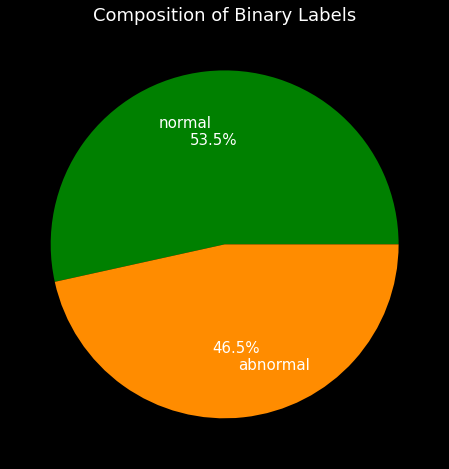

In [15]:
with plt.style.context('dark_background'):
  plt.subplots(figsize=(8,8))
  plt.pie(train1.binary_labels.value_counts(), autopct='%0.1f%%', labels=train1.binary_labels.unique(), labeldistance=0.7, colors=['green','darkorange'])
  plt.title('Composition of Binary Labels')
  plt.show()

The distribution of binary classes seems quite balanced

In [16]:
test1['binary_labels'] = ['normal' if x == 'normal' else 'abnormal' for x in test1.attack]

### For Multi-Class Data

#### Categorizing the different sorts of attack types into 4 main categories

In [17]:
DOS = ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop', 'apache2', 'udpstorm', 'processtable', 'worm', 'mailbomb']
Probe = ['satan', 'ipsweep', 'nmap', 'portsweep', 'mscan', 'saint']
R2L = ['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster', 'warezclient', 'spy', 'xlock', 'xsnoop', 'snmpguess', 'snmpgetattack', 'httptunnel', 'sendmail', 'named']
U2R = ['buffer_overflow', 'loadmodule', 'rootkit', 'perl', 'sqlattack', 'xterm', 'ps']

In [18]:
temp_list = []
for x in train1.attack:
  if x in DOS:
    temp_list.append('DOS')
  elif x in Probe:
    temp_list.append('Probe')
  elif x in R2L:
    temp_list.append('R2L')
  elif x in U2R:
    temp_list.append('U2R')
  else:
    temp_list.append(x)
train1['multi_labels'] = pd.Series(temp_list)

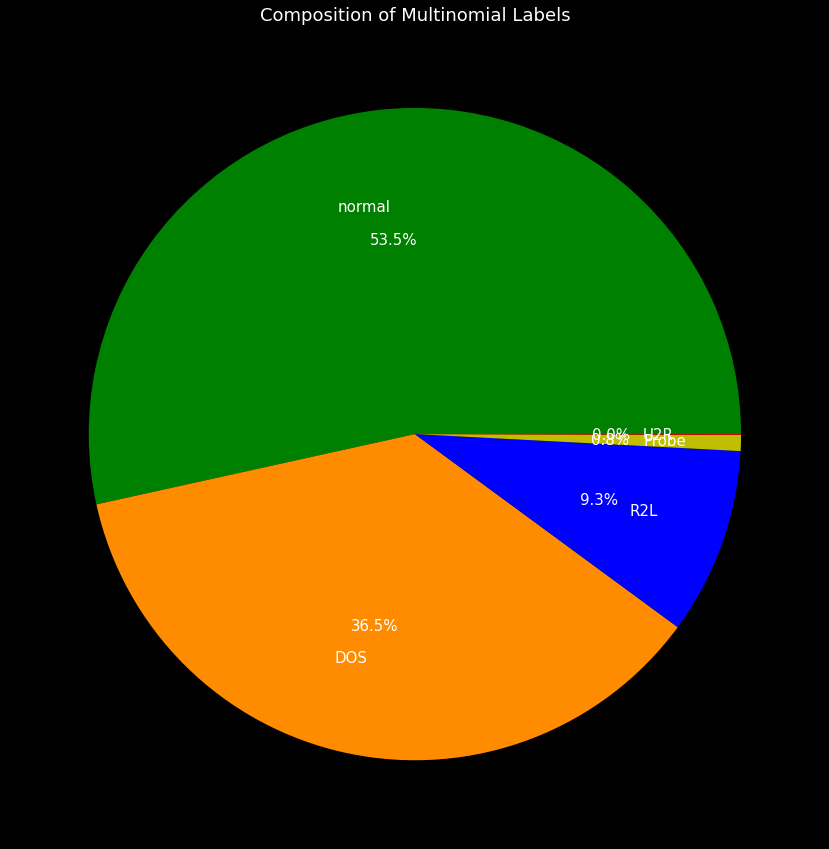

In [19]:
with plt.style.context('dark_background'):
  plt.subplots(figsize=(15,15))
  plt.pie(train1.multi_labels.value_counts(), autopct='%0.1f%%', labels=train1.multi_labels.unique(), labeldistance=0.7, colors=['green','darkorange', 'b', 'y', 'r'])
  plt.title('Composition of Multinomial Labels')
  plt.show()

Distribution for Multinomial classes seems pretty unbalanced, 'normal' and 'DOS' classes contributing for around 90% of the data combined together whereas 'Probe' and 'U2R' having less than 1% of data.

In [20]:
temp_list = []
for x in test1.attack:
  if x in DOS:
    temp_list.append('DOS')
  elif x in Probe:
    temp_list.append('Probe')
  elif x in R2L:
    temp_list.append('R2L')
  elif x in U2R:
    temp_list.append('U2R')
  else:
    temp_list.append(x)
test1['multi_labels'] = pd.Series(temp_list)

## Encoding Dependent Variables

### For Binary Data

In [21]:
train1['y_binary'] = train1.binary_labels.map({'normal':0, 'abnormal':1})

In [22]:
train1[['binary_labels', 'y_binary']].head()

,binary_labels,y_binary
0,normal,0
1,normal,0
2,abnormal,1
3,normal,0
4,normal,0


In [23]:
test1['y_binary'] = test1.binary_labels.map({'normal':0, 'abnormal':1})

### For Multi-Class Data

In [24]:
train1['y_multi'] = train1.multi_labels.map({'normal':0, 'DOS':1, 'Probe':2, 'R2L':3, 'U2R':4})

In [25]:
train1[['multi_labels', 'y_multi']].head()

,multi_labels,y_multi
0,normal,0
1,normal,0
2,DOS,1
3,normal,0
4,normal,0


In [26]:
test1['y_multi'] = test1.multi_labels.map({'normal':0, 'DOS':1, 'Probe':2, 'R2L':3, 'U2R':4})

### One - Hot Encoding the Multi-Class Dependent Variable

In [27]:
OH_Enc1 = OneHotEncoder(sparse=False)

In [28]:
train_y_OHEnc = pd.DataFrame(OH_Enc1.fit_transform(train1[['y_multi']]), columns=['normal', 'DOS', 'Probe', 'R2L', 'U2R'])
train_y_OHEnc.head()

,normal,DOS,Probe,R2L,U2R
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [29]:
test_y_OHEnc = pd.DataFrame(OH_Enc1.transform(test1[['y_multi']]), columns=['normal', 'DOS', 'Probe', 'R2L', 'U2R'])

## Feature Selection

### Bivariate Analysis of Independent variables using Correlation Matrix 

In [ ]:
corr_matrix = train[num_cols].corr()
corr_matrix.round(2)

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,duration,hot,is_guest_login,is_host_login,land,last_flag,logged_in,num_access_files,num_compromised,num_failed_logins,num_file_creations,num_outbound_cmds,num_root,num_shells,rerror_rate,root_shell,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment
count,1.00,0.22,-0.00,0.47,0.17,0.18,-0.14,-0.47,0.46,-0.40,-0.21,0.17,0.46,-0.08,-0.07,-0.07,-0.00,-0.01,-0.03,-0.54,-0.03,-0.01,-0.02,-0.02,NaN,-0.01,-0.01,0.16,-0.03,-0.63,0.46,-0.01,0.47,-0.26,0.16,0.45,-0.02,-0.01,-0.02
diff_srv_rate,0.22,1.00,-0.00,0.19,0.50,0.23,-0.01,-0.33,0.05,-0.30,-0.09,0.28,0.05,-0.01,-0.02,-0.01,-0.00,-0.00,-0.06,-0.22,-0.01,-0.00,-0.00,-0.01,NaN,-0.00,-0.00,0.27,-0.01,-0.38,0.05,-0.00,-0.11,-0.10,0.28,0.04,-0.01,-0.00,-0.03
dst_bytes,-0.00,-0.00,1.00,0.00,0.01,0.01,0.01,-0.00,-0.00,-0.00,-0.00,0.01,-0.00,0.03,-0.00,-0.00,-0.00,-0.00,-0.02,-0.00,0.00,0.00,0.00,0.00,NaN,0.00,-0.00,0.01,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.01,-0.00,0.00,0.00,-0.00
dst_host_count,0.47,0.19,0.00,1.00,0.14,0.07,-0.31,-0.52,0.41,-0.30,-0.46,0.07,0.41,0.05,-0.01,-0.01,0.00,-0.03,0.02,-0.40,-0.01,-0.01,-0.03,-0.00,NaN,-0.01,-0.01,0.07,-0.03,-0.51,0.40,-0.01,0.15,-0.36,0.07,0.39,-0.01,-0.01,0.04
dst_host_diff_srv_rate,0.17,0.50,0.01,0.14,1.00,0.41,0.23,-0.42,-0.02,-0.39,0.02,0.39,-0.03,0.25,-0.01,-0.01,0.01,-0.00,-0.18,-0.26,0.00,0.00,-0.00,0.01,NaN,0.00,-0.00,0.38,-0.01,-0.17,-0.02,0.00,-0.11,-0.12,0.38,-0.03,0.00,0.01,0.06
dst_host_rerror_rate,0.18,0.23,0.01,0.07,0.41,1.00,0.04,-0.26,-0.24,-0.25,0.04,0.92,-0.23,0.17,-0.03,-0.03,-0.00,-0.01,-0.10,-0.28,-0.01,-0.00,0.02,-0.01,NaN,-0.00,-0.00,0.93,-0.01,-0.21,-0.23,-0.00,-0.10,-0.08,0.92,-0.24,-0.00,-0.00,0.03
dst_host_same_src_port_rate,-0.14,-0.01,0.01,-0.31,0.23,0.04,1.00,0.14,-0.28,-0.07,0.41,0.03,-0.28,0.23,-0.03,-0.04,-0.00,0.03,-0.34,-0.16,-0.01,-0.00,-0.01,-0.01,NaN,-0.00,0.01,0.03,0.00,0.28,-0.28,0.00,0.16,0.25,0.03,-0.28,-0.01,0.00,0.04
dst_host_same_srv_rate,-0.47,-0.33,-0.00,-0.52,-0.42,-0.26,0.14,1.00,-0.64,0.90,0.20,-0.26,-0.63,-0.12,-0.04,-0.05,-0.00,0.01,0.13,0.60,0.01,-0.00,-0.00,-0.02,NaN,-0.01,-0.01,-0.26,0.01,0.79,-0.62,-0.01,0.18,0.29,-0.26,-0.62,-0.02,-0.00,-0.05
dst_host_serror_rate,0.46,0.05,-0.00,0.41,-0.02,-0.24,-0.28,-0.64,1.00,-0.57,-0.17,-0.23,0.99,-0.06,-0.06,-0.06,0.00,0.02,0.00,-0.49,-0.02,-0.00,-0.01,0.00,NaN,-0.00,-0.01,-0.23,-0.02,-0.76,0.98,-0.00,-0.15,-0.23,-0.23,0.98,-0.01,-0.00,-0.05
dst_host_srv_count,-0.40,-0.30,-0.00,-0.30,-0.39,-0.25,-0.07,0.90,-0.57,1.00,-0.00,-0.25,-0.57,-0.11,-0.05,-0.07,-0.00,-0.01,0.27,0.62,0.00,-0.01,-0.02,-0.02,NaN,-0.01,-0.01,-0.25,-0.01,0.71,-0.56,-0.01,0.20,0.15,-0.25,-0.56,-0.02,-0.01,-0.05


In [ ]:
#corr_matrix.to_excel('NIDS_corr_matrix.xlsx')

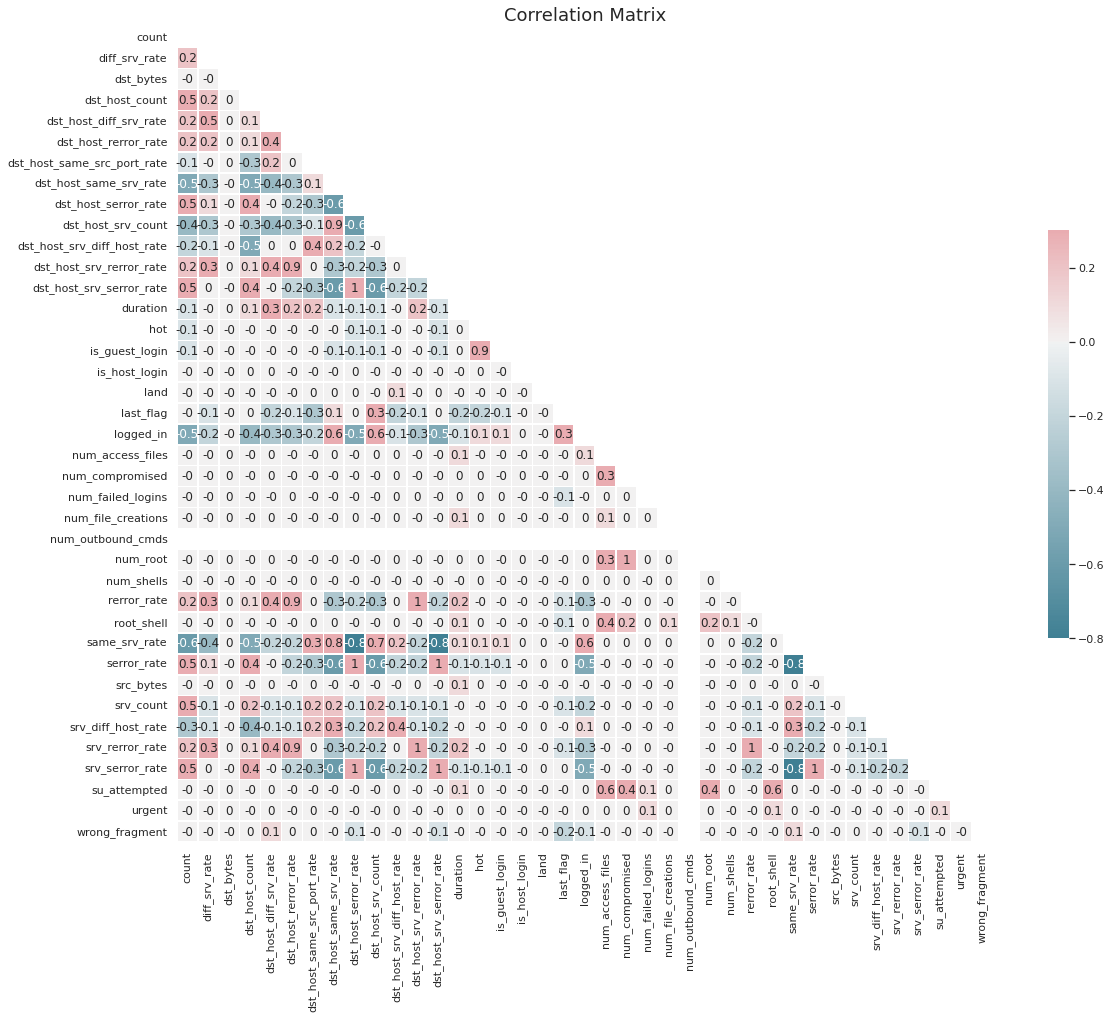

In [ ]:
sns.set(style="white")
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr_matrix.round(1), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

Variables to be removed to avoid multi-colinearity after the multivariate analysis are : logged_in, dst_host_srv_count, dst_host_serror_rate, dst_host_rerror_rate, dst_host_same_srv_rate, is_guest_login

### Bivariate Analysis of Independt variables with Dependent variables (Correlaton)

#### For Binary Data

Correlation was calculated using Point Biserial Correlation Coefficient as most of the indenpendent variables are Continuous and dependent variable is Binary.

In [ ]:
temp_list = []
for x in train1[num_cols].columns:
 temp_list.append(np.abs(stats.pointbiserialr(train1[x], train1['y_binary'])[0]))
binary_corr_df = pd.DataFrame(temp_list, index=train1[num_cols].columns, columns=['r_value_abs'])

In [ ]:
binary_corr_df.head()

,r_value_abs
count,0.576444
diff_srv_rate,0.203660
dst_bytes,0.004118
dst_host_count,0.375052
dst_host_diff_srv_rate,0.242898


Taking 0.5 as the cut - off, we are gonna filter the independent variables who are signficantly correlated with the Dependent Variable

In [ ]:
binary_corr_df[binary_corr_df.r_value_abs>0.5]

,r_value_abs
count,0.576444
dst_host_same_srv_rate,0.693803
dst_host_serror_rate,0.651842
dst_host_srv_count,0.722535
dst_host_srv_serror_rate,0.654985
logged_in,0.690171
same_srv_rate,0.751913
serror_rate,0.650652
srv_serror_rate,0.648289


We are going to remove 'count', 'dst_host_same_srv_rate', 'dst_host_srv_serror_rate' to avoid Multicolinearity as these variables are quite significantly correlated with other Independent variables.

In [ ]:
final_num_vars_binary = list(binary_corr_df[binary_corr_df.r_value_abs>0.5].index.difference(['count', 'dst_host_same_srv_rate', 'dst_host_srv_serror_rate']))
print(final_num_vars_binary)

['dst_host_serror_rate', 'dst_host_srv_count', 'logged_in', 'same_srv_rate', 'serror_rate', 'srv_serror_rate']


In [30]:
final_num_vars_binary = ['dst_host_serror_rate', 'dst_host_srv_count', 'logged_in', 'same_srv_rate', 'serror_rate', 'srv_serror_rate']

#### For Multi-Class Data

Correlation was calculated using pearson's coefficient of correlation.

In [ ]:
multi_corr_df = pd.DataFrame(np.abs(train1[train1.columns.difference(['attack', 'binary_labels', 'multi_labels', 'y_binary'])].corr()['y_multi'])).rename(columns = {'y_multi':'r_value_abs'})
multi_corr_df.head()

,r_value_abs
count,0.388358
diff_srv_rate,0.282314
dst_bytes,0.008651
dst_host_count,0.196102
dst_host_diff_srv_rate,0.391328


Taking 0.5 as the cut - off, we are gonna filter the independent variables who are signficantly correlated with the Dependent Variable

In [ ]:
multi_corr_df[multi_corr_df.r_value_abs > 0.5]

,r_value_abs
dst_host_same_srv_rate,0.525829
dst_host_srv_count,0.624241
last_flag,0.557251
logged_in,0.576031
same_srv_rate,0.510871
y_multi,1.000000


Similarly, Here also we are going to remove 'count', 'dst_host_same_srv_rate', 'dst_host_srv_serror_rate' to avoid Multicolinearity as these variables are quite significantly correlated iwth other Independent variables.

In [ ]:
final_num_vars_multi = list(multi_corr_df[multi_corr_df.r_value_abs>0.5].index.difference(['y_multi', 'count', 'dst_host_same_srv_rate', 'dst_host_srv_serror_rate']))
final_num_vars_multi

['dst_host_srv_count', 'last_flag', 'logged_in', 'same_srv_rate']

In [31]:
final_num_vars_multi = ['dst_host_srv_count', 'last_flag', 'logged_in', 'same_srv_rate']

## Outliers Treatment

#### We will be capping all the numerical variables at 1st and 99th percentile.

In [32]:
train1[num_cols] = train1[num_cols].apply(lambda x : x.clip(lower=x.quantile(0.01) ,upper=x.quantile(0.99)))

# Data Pre-Processing before Data Modelling

## Standardization

In [33]:
sc = StandardScaler()

In [34]:
train1[num_cols] = sc.fit_transform(train1[num_cols])

In [ ]:
train1[num_cols].head()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,duration,hot,is_guest_login,is_host_login,land,last_flag,logged_in,num_access_files,num_compromised,num_failed_logins,num_file_creations,num_outbound_cmds,num_root,num_shells,rerror_rate,root_shell,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment
0,-0.717047,-0.349683,-0.352792,-0.324063,-0.280282,-0.224532,0.069972,-0.782367,-0.639532,-0.818890,-0.320917,-0.376387,-0.624871,-0.138442,-0.140747,0.0,0.0,0.0,0.220168,-0.809262,0.0,-0.101557,0.0,0.0,0.0,0.0,0.0,-0.374362,0.0,0.771283,-0.637209,-0.087734,-0.357788,-0.374560,-0.374432,-0.631929,0.0,0.0,0.0
1,-0.620984,0.482201,-0.352792,0.734343,2.736852,-0.387635,2.367737,-1.161030,-0.639532,-1.035688,-0.320917,-0.376387,-0.624871,-0.138442,-0.140747,0.0,0.0,0.0,-2.205384,-0.809262,0.0,-0.101557,0.0,0.0,0.0,0.0,0.0,-0.374362,0.0,-1.321428,-0.637209,-0.143942,-0.371789,-0.374560,-0.374432,-0.631929,0.0,0.0,0.0
2,0.339647,0.038529,-0.352792,0.734343,-0.174417,-0.387635,-0.480197,-0.938287,1.608759,-0.809857,-0.320917,-0.376387,1.618955,-0.138442,-0.140747,0.0,0.0,0.0,-0.264942,-0.809262,0.0,-0.101557,0.0,0.0,0.0,0.0,0.0,-0.374362,0.0,-1.389669,1.602664,-0.167729,-0.301781,-0.374560,-0.374432,1.605104,0.0,0.0,0.0
3,-0.690848,-0.349683,1.790321,-1.533670,-0.439078,-0.387635,-0.383108,1.066401,-0.572083,1.258754,0.112042,-0.345084,-0.602433,-0.138442,-0.140747,0.0,0.0,0.0,0.705278,1.235694,0.0,-0.101557,0.0,0.0,0.0,0.0,0.0,-0.374362,0.0,0.771283,-0.189235,-0.129931,-0.315783,-0.374560,-0.374432,-0.184522,0.0,0.0,0.0
4,-0.472523,-0.349683,-0.242390,0.734343,-0.439078,-0.387635,-0.480197,1.066401,-0.639532,1.258754,-0.320917,-0.376387,-0.624871,-0.138442,-0.140747,0.0,0.0,0.0,0.705278,1.235694,0.0,-0.101557,0.0,0.0,0.0,0.0,0.0,-0.374362,0.0,0.771283,-0.637209,-0.135307,0.062263,-0.028179,-0.374432,-0.631929,0.0,0.0,0.0


In [35]:
test1[num_cols] = sc.transform(test1[num_cols])

In [36]:
test1[num_cols].head()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,duration,hot,is_guest_login,is_host_login,land,last_flag,logged_in,num_access_files,num_compromised,num_failed_logins,num_file_creations,num_outbound_cmds,num_root,num_shells,rerror_rate,root_shell,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment
0,1.265346,-0.016930,-0.352792,0.734343,-0.121485,2.874410,-0.480197,-1.071933,-0.639532,-0.954389,-0.320917,2.753914,-0.624871,-0.138442,-0.140747,0.0,0.0,0.0,0.705278,-0.809262,0.0,-0.101557,0.0,0.0,0.0,0.0,0.0,2.746403,0.0,-1.412415,-0.637209,-0.167729,-0.245774,-0.374560,2.715365,-0.631929,0.0,0.0,0.0
1,0.453176,-0.016930,-0.352792,0.734343,-0.121485,2.874410,-0.480197,-1.161030,-0.639532,-1.035688,-0.320917,2.753914,-0.624871,-0.138442,-0.140747,0.0,0.0,0.0,0.705278,-0.809262,0.0,-0.101557,0.0,0.0,0.0,0.0,0.0,2.746403,0.0,-1.480656,-0.637209,-0.167729,-0.371789,-0.374560,2.715365,-0.631929,0.0,0.0,0.0
2,-0.725780,-0.349683,-0.352792,-0.485344,-0.227350,-0.387635,1.493939,0.197703,-0.639532,-0.267863,-0.104438,-0.376387,-0.624871,-0.136617,-0.140747,0.0,0.0,0.0,0.705278,-0.809262,0.0,-0.101557,0.0,0.0,0.0,0.0,0.0,-0.374362,0.0,0.771283,-0.637209,1.947498,-0.371789,-0.374560,-0.374432,-0.631929,0.0,0.0,0.0
3,-0.725780,-0.349683,-0.352792,-1.805832,-0.439078,-0.387635,2.756092,1.066401,-0.639532,-0.529827,2.709796,-0.376387,-0.624871,-0.138442,-0.140747,0.0,0.0,0.0,-2.205384,-0.809262,0.0,-0.101557,0.0,0.0,0.0,0.0,0.0,-0.374362,0.0,0.771283,-0.637209,-0.164470,0.524319,3.474118,-0.374432,-0.631929,0.0,0.0,0.0
4,-0.725780,-0.349683,-0.348849,-1.543751,0.460769,2.319862,-0.383108,-0.470526,-0.639532,-0.267863,-0.104438,1.846127,-0.624871,-0.137529,-0.140747,0.0,0.0,0.0,-4.145825,-0.809262,0.0,-0.101557,0.0,0.0,0.0,0.0,0.0,2.746403,0.0,0.771283,-0.637209,-0.167729,-0.273777,2.511949,1.170466,-0.363485,0.0,0.0,0.0


## Dummy Vriables Creation

In [ ]:
train1[cat_cols].head()

,flag,protocol_type,service
0,SF,tcp,ftp_data
1,SF,udp,other
2,S0,tcp,private
3,SF,tcp,http
4,SF,tcp,http


In [ ]:
train1[cat_cols].nunique()

flag             11
protocol_type     3
service          70
dtype: int64

In [37]:
OH_Enc2 = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first')

In [38]:
OH_train_cols = pd.DataFrame(OH_Enc2.fit_transform(train1[cat_cols]), columns=OH_Enc2.get_feature_names_out())

In [ ]:
OH_train_cols.head()

,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,...,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
train1.drop(cat_cols, axis=1, inplace=True)

In [40]:
OH_test_cols = pd.DataFrame(OH_Enc2.transform(test1[cat_cols]), columns=OH_Enc2.get_feature_names_out())

In [41]:
test1.drop(cat_cols, axis=1, inplace=True)

### Merging the Final Standardized Numerical variables with Dummy Variables

In [42]:
train_x_binary = pd.concat([train1[final_num_vars_binary], OH_train_cols], axis=1)
test_x_binary = pd.concat([test1[final_num_vars_binary], OH_test_cols], axis=1)

In [43]:
train_x_multi = pd.concat([train1[final_num_vars_multi], OH_train_cols], axis=1)
test_x_multi = pd.concat([test1[final_num_vars_multi], OH_test_cols], axis=1)

### Defining our Dependent Variable

In [44]:
train_y_binary = train1.y_binary
test_y_binary = test1.y_binary

In [45]:
train_y_multi = train1.y_multi
test_y_multi= test1.y_multi

### Defining our Classes

In [46]:
binary_classes = ['normal', 'abnormal']

In [47]:
multi_classes = ['normal', 'DOS', 'Probe', 'R2L', 'U2R']

# Data Modelling

## Logistic Regression

### Binary Classification

In [48]:
logreg_binary = LogisticRegression(random_state=12345)

In [49]:
logreg_binary.fit(train_x_binary, train_y_binary)

LogisticRegression(random_state=12345)

In [50]:
print('Accuracy for Training :',accuracy_score(train_y_binary, logreg_binary.predict(train_x_binary)),' | ', 'Accuracy for Testing :',accuracy_score(test_y_binary, logreg_binary.predict(test_x_binary)))

Accuracy for Training : 0.9640399133147579  |  Accuracy for Testing : 0.7578069552874379


In [51]:
print('AUC for Training :',roc_auc_score(train_y_binary, logreg_binary.predict_proba(train_x_binary)[:,1]),' | ', 'AUC for Testing :',roc_auc_score(test_y_binary, logreg_binary.predict_proba(test_x_binary)[:,1]))
auc_logreg_binary = roc_auc_score(test_y_binary, logreg_binary.predict_proba(test_x_binary)[:,1])

AUC for Training : 0.9915100730852853  |  AUC for Testing : 0.8629124830808368


#### Finding an Optimal Probability Decision Threshold using predict_proba

In [ ]:
logreg_binary_df = pd.DataFrame({'actual':train_y_binary,
                    'prob':logreg_binary.predict_proba(train_x_binary)[:,1]})
logreg_binary_df.head().head()

,actual,prob
0,0,0.077951
1,0,0.236961
2,1,0.999964
3,0,0.022019
4,0,0.011201


In [ ]:
roc_df = pd.DataFrame()
train_temp = logreg_binary_df.copy()

for cut_off in np.linspace(0,1,100):
    
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_df = pd.concat([roc_df, roc_table], axis=0)

roc_df['senstivity+specificity'] = roc_df['sensitivity'] + roc_df['specificity']
roc_df

,cutoff,sensitivity,specificity,accuracy,senstivity+specificity
0,0.000000,1.000000,0.000000,0.465417,1.000000
0,0.010101,0.999693,0.220543,0.583173,1.220236
0,0.020202,0.994678,0.729074,0.852691,1.723752
0,0.030303,0.993314,0.750768,0.863653,1.744082
0,0.040404,0.992291,0.775790,0.876553,1.768080
...,...,...,...,...,...
0,0.959596,0.788965,0.994936,0.899074,1.783901
0,0.969697,0.762988,0.995337,0.887198,1.758326
0,0.979798,0.723418,0.996080,0.869178,1.719498
0,0.989899,0.652141,0.997594,0.836814,1.649735


In [ ]:
roc_df.iloc[roc_df['senstivity+specificity'].argmax(),:]

cutoff                    0.626263
sensitivity               0.952004
specificity               0.979790
accuracy                  0.966858
senstivity+specificity    1.931794
Name: 0, dtype: float64

In [52]:
print('Accuracy for Decison Threshold = 0.62 :')
print('Accuracy for Training :',accuracy_score(train_y_binary,logreg_binary.predict_proba(train_x_binary)[:,1]>0.62),' | ', 'Accuracy for Testing :',accuracy_score(test_y_binary,logreg_binary.predict_proba(test_x_binary)[:,1]>0.62))
acc_logreg_binary  = accuracy_score(test_y_binary,logreg_binary.predict_proba(test_x_binary)[:,1]>0.62)

Accuracy for Decison Threshold = 0.62 :
Accuracy for Training : 0.9664769434720138  |  Accuracy for Testing : 0.747028034066714


In [54]:
print(classification_report(test_y_binary, logreg_binary.predict(test_x_binary), target_names = binary_classes))

              precision    recall  f1-score   support

      normal       0.65      0.97      0.78      9711
    abnormal       0.96      0.60      0.74     12833

    accuracy                           0.76     22544
   macro avg       0.80      0.78      0.76     22544
weighted avg       0.83      0.76      0.75     22544



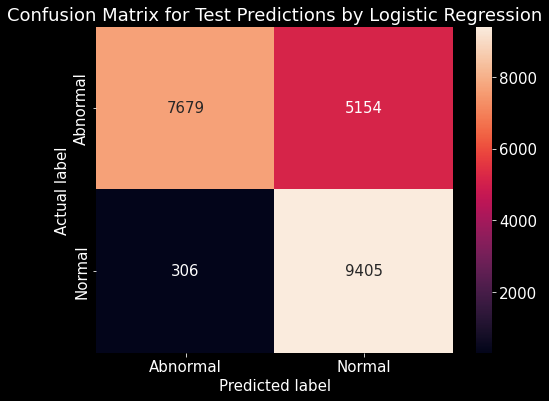

In [53]:
cm_logreg_binary = confusion_matrix(test_y_binary, logreg_binary.predict(test_x_binary), labels=[1,0])
with plt.style.context('dark_background'):
  plt.figure(figsize=(8,6))
  sns.heatmap(cm_logreg_binary, annot=True,  fmt='d', xticklabels = ["Abnormal", "Normal"] , yticklabels = ["Abnormal", "Normal"] )
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title('Confusion Matrix for Test Predictions by Logistic Regression')
  plt.show()

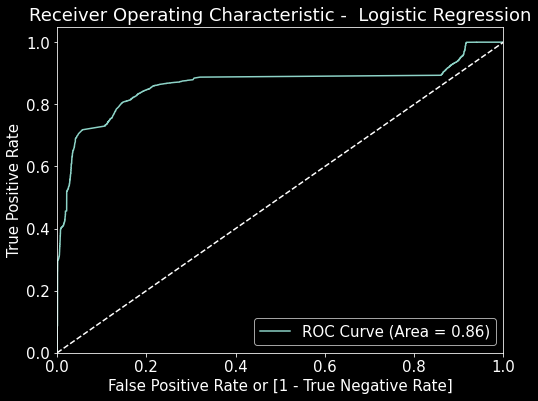

In [55]:
fpr, tpr, thresholds = roc_curve( test_y_binary, logreg_binary.predict_proba(test_x_binary)[:,1], drop_intermediate = False )
with plt.style.context('dark_background'):
  plt.figure(figsize=(8, 6))
  plt.plot( fpr, tpr, label='ROC Curve (Area = %0.2f)' % roc_auc_score(test_y_binary, logreg_binary.predict_proba(test_x_binary)[:,1]))
  plt.plot([0, 1], [0, 1], 'w--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic -  Logistic Regression')
  plt.legend(loc="lower right")
  plt.show()

### Multi-Class Classification

In [56]:
logreg_multi = LogisticRegression(random_state=12345)

In [57]:
logreg_multi.fit(train_x_multi, train_y_multi)

LogisticRegression(random_state=12345)

In [58]:
print('Accuracy for Training :',accuracy_score(train_y_multi, logreg_multi.predict(train_x_multi)),' | ', 'Accuracy for Testing :',accuracy_score(test_y_multi, logreg_multi.predict(test_x_multi)))

Accuracy for Training : 0.9556571646305161  |  Accuracy for Testing : 0.7760823278921221


In [59]:
print('Cohen\'s Kappa for Training :',cohen_kappa_score(train_y_multi, logreg_multi.predict(train_x_multi)),' | ', 'Cohen\'s Kappa for Testing :',cohen_kappa_score(test_y_multi, logreg_multi.predict(test_x_multi)))
cohen_logreg_multi = cohen_kappa_score(test_y_multi, logreg_multi.predict(test_x_multi))

Cohen's Kappa for Training : 0.922511276260156  |  Cohen's Kappa for Testing : 0.6561028613877624


In [60]:
print(classification_report(test_y_multi, logreg_multi.predict(test_x_multi), target_names = multi_classes))

              precision    recall  f1-score   support

      normal       0.75      0.96      0.84      9711
         DOS       0.87      0.75      0.81      7460
       Probe       0.62      0.66      0.64      2421
         R2L       0.94      0.33      0.49      2885
         U2R       0.25      0.49      0.34        67

    accuracy                           0.78     22544
   macro avg       0.69      0.64      0.62     22544
weighted avg       0.80      0.78      0.76     22544



In [62]:
f1_logreg_multi = f1_score(test_y_multi, logreg_multi.predict(test_x_multi), average='weighted')

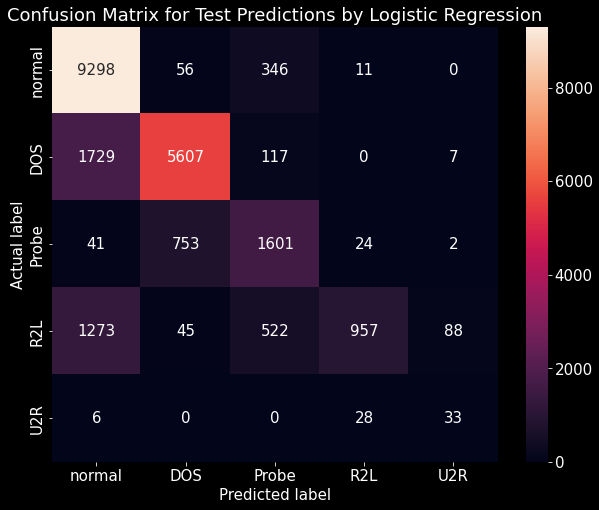

In [63]:
cm_logreg_multi = confusion_matrix(test_y_multi, logreg_multi.predict(test_x_multi), labels=[0,1,2,3,4])
with plt.style.context('dark_background'):
  plt.figure(figsize=(10,8))
  sns.heatmap(cm_logreg_multi, annot=True,  fmt='d', xticklabels = multi_classes, yticklabels = multi_classes )
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title('Confusion Matrix for Test Predictions by Logistic Regression')
  plt.show()

## Linear Support Vector Machine

### Binary Classification

In [64]:
lsvc_binary = SVC(kernel='linear', gamma='auto', probability=True, random_state=12345)

In [65]:
lsvc_binary.fit(train_x_binary, train_y_binary)

SVC(gamma='auto', kernel='linear', probability=True, random_state=12345)

In [68]:
print('Accuracy for Training :',accuracy_score(train_y_binary, lsvc_binary.predict(train_x_binary)),' | ', 'Accuracy for Testing :',accuracy_score(test_y_binary, lsvc_binary.predict(test_x_binary)))
acc_lsvc_binary = accuracy_score(test_y_binary, lsvc_binary.predict(test_x_binary))

Accuracy for Training : 0.9643891945099347  |  Accuracy for Testing : 0.7684971611071683


In [69]:
print('AUC for Training :',roc_auc_score(train_y_binary, lsvc_binary.predict_proba(train_x_binary)[:,1]),' | ', 'AUC for Testing :',roc_auc_score(test_y_binary, lsvc_binary.predict_proba(test_x_binary)[:,1]))
auc_lsvc_binary = roc_auc_score(test_y_binary, lsvc_binary.predict_proba(test_x_binary)[:,1])

AUC for Training : 0.9890375108873203  |  AUC for Testing : 0.8796929902724547


In [70]:
print(classification_report(test_y_binary, lsvc_binary.predict(test_x_binary), target_names=binary_classes))

              precision    recall  f1-score   support

      normal       0.67      0.90      0.77      9711
    abnormal       0.90      0.67      0.77     12833

    accuracy                           0.77     22544
   macro avg       0.79      0.78      0.77     22544
weighted avg       0.80      0.77      0.77     22544



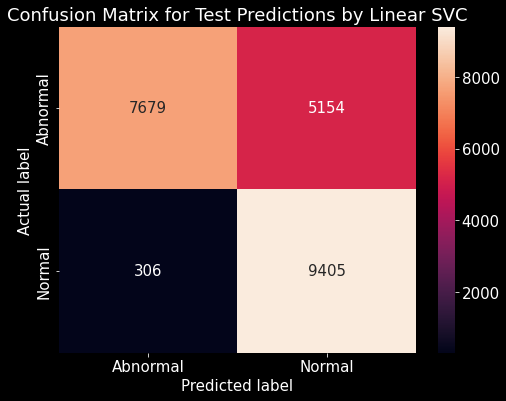

In [71]:
cm_lvsc_binary = confusion_matrix(test_y_binary, lsvc_binary.predict(test_x_binary), labels=[1,0])
with plt.style.context('dark_background'):
  plt.figure(figsize=(8,6))
  sns.heatmap(cm_logreg_binary, annot=True,  fmt='d', xticklabels = ["Abnormal", "Normal"] , yticklabels = ["Abnormal", "Normal"] )
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title('Confusion Matrix for Test Predictions by Linear SVC')
  plt.show()

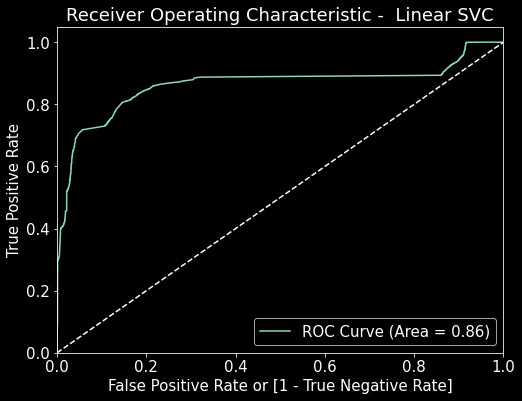

In [72]:
lsvc_pred_prob_binary = logreg_binary.predict_proba(test_x_binary)[:,1]
fpr, tpr, thresholds = roc_curve(test_y_binary, lsvc_pred_prob_binary, drop_intermediate = False )
with plt.style.context('dark_background'):
  plt.figure(figsize=(8, 6))
  plt.plot( fpr, tpr, label='ROC Curve (Area = %0.2f)' % roc_auc_score(test_y_binary, lsvc_pred_prob_binary))
  plt.plot([0, 1], [0, 1], 'w--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic -  Linear SVC')
  plt.legend(loc="lower right")
  plt.show()

### Multi-Class Classification

In [73]:
lsvc_multi = SVC(kernel='linear', gamma='auto', random_state=12345)

In [74]:
lsvc_multi.fit(train_x_multi, train_y_multi)

SVC(gamma='auto', kernel='linear', random_state=12345)

In [75]:
print('Accuracy for Training :',accuracy_score(train_y_multi, lsvc_multi.predict(train_x_multi)),' | ', 'Accuracy for Testing :',accuracy_score(test_y_multi, lsvc_multi.predict(test_x_multi)))

Accuracy for Training : 0.9621188667412859  |  Accuracy for Testing : 0.777013839602555


In [76]:
print('Cohen\'s Kappa for Training :',cohen_kappa_score(train_y_multi, lsvc_multi.predict(train_x_multi)),' | ', 'Cohen\'s Kappa for Testing :',cohen_kappa_score(test_y_multi, lsvc_multi.predict(test_x_multi)))
cohen_lsvc_multi = cohen_kappa_score(test_y_multi, lsvc_multi.predict(test_x_multi))

Cohen's Kappa for Training : 0.933909117703656  |  Cohen's Kappa for Testing : 0.6559026122373779


In [77]:
print(classification_report(test_y_multi, lsvc_multi.predict(test_x_multi), target_names = multi_classes))

              precision    recall  f1-score   support

      normal       0.74      0.96      0.84      9711
         DOS       0.88      0.77      0.82      7460
       Probe       0.67      0.70      0.68      2421
         R2L       0.92      0.27      0.41      2885
         U2R       0.29      0.55      0.38        67

    accuracy                           0.78     22544
   macro avg       0.70      0.65      0.63     22544
weighted avg       0.80      0.78      0.76     22544



In [79]:
f1_lsvc_multi = f1_score(test_y_multi, lsvc_multi.predict(test_x_multi), average='weighted')

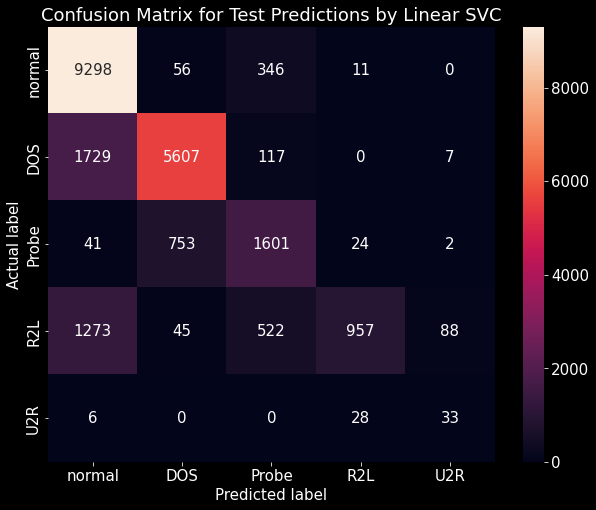

In [ ]:
cm_lvsc_multi = confusion_matrix(test_y_multi, lsvc_multi.predict(test_x_multi), labels=[0,1,2,3,4])
with plt.style.context('dark_background'):
  plt.figure(figsize=(10,8))
  sns.heatmap(cm_logreg_multi, annot=True,  fmt='d', xticklabels = multi_classes, yticklabels = multi_classes )
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title('Confusion Matrix for Test Predictions by Linear SVC')
  plt.show()

## Artifical Neural NetwORks - Muli Layer Perceptron

#### using Sequential Model with Dense Layers

In [80]:
callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

### Binary Classification

In [81]:
# Initializing our Model
mlp_binary = Sequential()

In [82]:
print('Input Dimensions should be :',train_x_binary.shape[1])
print('Maximum Number of Nodes per Layer Should be around :',2/3*train_x_binary.shape[1] + train_y_binary.nunique()-1)
print('Nodes for the output layer should be around :',train_y_binary.nunique()-1)

Input Dimensions should be : 87
Maximum Number of Nodes per Layer Should be around : 59.0
Nodes for the output layer should be around : 1


In [83]:
# Adding the Input Layer and the First Hidden Layer
mlp_binary.add(Dense(units = 59, kernel_initializer = 'uniform', activation = 'softmax', input_dim = 87))

# Adding the Second Hidden Layer
mlp_binary.add(Dense(units = 40, kernel_initializer = 'uniform', activation = 'softmax'))

# Adding the Third Layer
mlp_binary.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'softmax'))

# Adding the Output Layer
mlp_binary.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [84]:
# Compiling Neural Network
mlp_binary.compile(optimizer = 'adam', loss = 'binary_crossentropy', weighted_metrics = ['accuracy'])

In [85]:
# Fitting our Model 
mlp_binary.fit(train_x_binary, train_y_binary, batch_size = 10, epochs = 100, callbacks=callback, validation_data=(test_x_binary, test_y_binary))

Epoch 1/100
12598/12598 [==============================] - 22s 2ms/step - loss: 0.2087 - accuracy: 0.9237 - val_loss: 0.8359 - val_accuracy: 0.7425
Epoch 2/100
12598/12598 [==============================] - 22s 2ms/step - loss: 0.1100 - accuracy: 0.9717 - val_loss: 0.8379 - val_accuracy: 0.7438
Epoch 3/100
12598/12598 [==============================] - 21s 2ms/step - loss: 0.1072 - accuracy: 0.9720 - val_loss: 0.8333 - val_accuracy: 0.7419
Epoch 4/100
12598/12598 [==============================] - 22s 2ms/step - loss: 0.1058 - accuracy: 0.9725 - val_loss: 0.8188 - val_accuracy: 0.7428
Epoch 5/100
12598/12598 [==============================] - 21s 2ms/step - loss: 0.1048 - accuracy: 0.9730 - val_loss: 0.8382 - val_accuracy: 0.7398
Epoch 6/100
12598/12598 [==============================] - 20s 2ms/step - loss: 0.0924 - accuracy: 0.9734 - val_loss: 0.8811 - val_accuracy: 0.7652
Epoch 7/100
12598/12598 [==============================] - 21s 2ms/step - loss: 0.0793 - accuracy: 0.9740 - val_

In [86]:
mlp_binary.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 59)                5192      
                                                                 
 dense_1 (Dense)             (None, 40)                2400      
                                                                 
 dense_2 (Dense)             (None, 20)                820       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________


Using Response Rate as our Probability Decision Threshold Value

In [87]:
print('Response Rate : %.2f'%train_y_binary.mean())

Response Rate : 0.47


In [88]:
print('Accuracy for Training :',accuracy_score(train_y_binary, mlp_binary.predict(train_x_binary)>0.47),' | ', 'Accuracy for Testing :',accuracy_score(test_y_binary, mlp_binary.predict(test_x_binary)>0.47))
acc_mlp_binary = accuracy_score(test_y_binary, mlp_binary.predict(test_x_binary)>0.47)

Accuracy for Training : 0.9756376366364221  |  Accuracy for Testing : 0.7826472675656494


In [89]:
print('AUC for Training :',roc_auc_score(train_y_binary, mlp_binary.predict(train_x_binary)),' | ', 'AUC for Testing :',roc_auc_score(test_y_binary, mlp_binary.predict(test_x_binary)))
auc_mlp_binary = roc_auc_score(test_y_binary, mlp_binary.predict(test_x_binary))

AUC for Training : 0.9950558851473463  |  AUC for Testing : 0.8308627958617303


In [90]:
print(classification_report(test_y_binary, mlp_binary.predict(test_x_binary)>0.47, target_names = binary_classes))

              precision    recall  f1-score   support

      normal       0.67      0.97      0.79      9711
    abnormal       0.96      0.64      0.77     12833

    accuracy                           0.78     22544
   macro avg       0.82      0.81      0.78     22544
weighted avg       0.84      0.78      0.78     22544



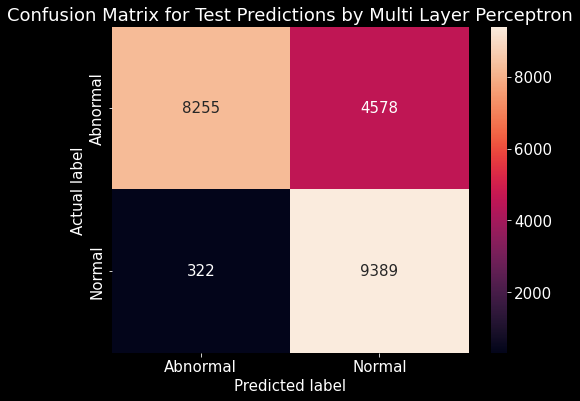

In [91]:
cm_mlp_binary = confusion_matrix(test_y_binary, mlp_binary.predict(test_x_binary)>0.47, labels=[1,0])
with plt.style.context('dark_background'):
  plt.figure(figsize=(8,6))
  sns.heatmap(cm_mlp_binary, annot=True,  fmt='d', xticklabels = ["Abnormal", "Normal"] , yticklabels = ["Abnormal", "Normal"] )
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title('Confusion Matrix for Test Predictions by Multi Layer Perceptron')
  plt.show()

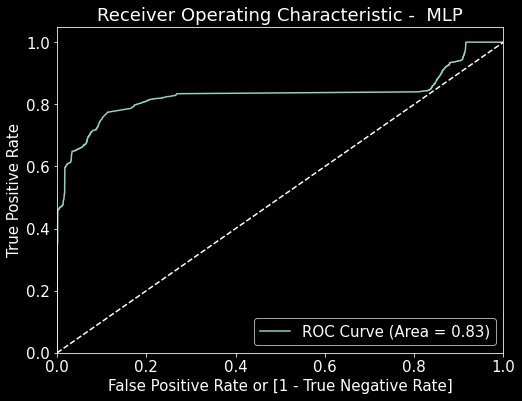

In [92]:
mlp_pred_prob_binary = mlp_binary.predict(test_x_binary)
fpr, tpr, thresholds = roc_curve(test_y_binary, mlp_pred_prob_binary, drop_intermediate = False )
with plt.style.context('dark_background'):
  plt.figure(figsize=(8, 6))
  plt.plot( fpr, tpr, label='ROC Curve (Area = %0.2f)' % roc_auc_score(test_y_binary, mlp_pred_prob_binary))
  plt.plot([0, 1], [0, 1], 'w--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic -  MLP')
  plt.legend(loc="lower right")
  plt.show()

### Multi-Class Classification

In [93]:
# Initializing our Model
mlp_multi = Sequential()

In [94]:
print('Input Dimensions should be :',train_x_multi.shape[1])
print('Maximum Number of Nodes per Layer Should be around :',2/3*train_x_multi.shape[1] + train_y_multi.nunique())
print('Nodes for the output layer should be around :',train_y_multi.nunique())

Input Dimensions should be : 85
Maximum Number of Nodes per Layer Should be around : 61.666666666666664
Nodes for the output layer should be around : 5


In [95]:
# Adding the Input Layer and the First Hidden Layer
mlp_multi.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'softmax', input_dim = 85))

# Adding the Second Hidden Layer
mlp_multi.add(Dense(units = 40, kernel_initializer = 'uniform', activation = 'softmax'))

# Adding the Third Layer
mlp_multi.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'softmax'))

# Adding the Output Layer
mlp_multi.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [96]:
# Compiling Neural Network
mlp_multi.compile(optimizer = 'adam', loss = 'categorical_crossentropy', weighted_metrics = ['accuracy'])

In [97]:
# Fitting our Model
mlp_multi.fit(train_x_multi, train_y_OHEnc, batch_size = 10, epochs = 100, callbacks=callback, validation_data=(test_x_multi, test_y_OHEnc))

Epoch 1/100
12598/12598 [==============================] - 22s 2ms/step - loss: 0.3461 - accuracy: 0.8846 - val_loss: 0.9600 - val_accuracy: 0.7609
Epoch 2/100
12598/12598 [==============================] - 21s 2ms/step - loss: 0.0997 - accuracy: 0.9716 - val_loss: 0.9430 - val_accuracy: 0.7449
Epoch 3/100
12598/12598 [==============================] - 21s 2ms/step - loss: 0.0747 - accuracy: 0.9785 - val_loss: 1.0924 - val_accuracy: 0.7880
Epoch 4/100
12598/12598 [==============================] - 20s 2ms/step - loss: 0.0626 - accuracy: 0.9814 - val_loss: 1.2138 - val_accuracy: 0.7922
Epoch 5/100
12598/12598 [==============================] - 20s 2ms/step - loss: 0.0563 - accuracy: 0.9826 - val_loss: 1.2383 - val_accuracy: 0.7936
Epoch 6/100
12598/12598 [==============================] - 20s 2ms/step - loss: 0.0532 - accuracy: 0.9834 - val_loss: 1.3148 - val_accuracy: 0.7925
Epoch 7/100
12598/12598 [==============================] - 21s 2ms/step - loss: 0.0501 - accuracy: 0.9844 - val_

In [98]:
mlp_multi.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 60)                5160      
                                                                 
 dense_5 (Dense)             (None, 40)                2440      
                                                                 
 dense_6 (Dense)             (None, 20)                820       
                                                                 
 dense_7 (Dense)             (None, 5)                 105       
                                                                 
Total params: 8,525
Trainable params: 8,525
Non-trainable params: 0
_________________________________________________________________


In [99]:
mlp_pred_proba_train = mlp_multi.predict(train_x_multi)
mlp_pred_train = pd.Series(np.argmax(mlp_pred_proba_train, axis=1), name='pred')

In [100]:
mlp_pred_proba_test = mlp_multi.predict(test_x_multi)
mlp_pred_test = pd.Series(np.argmax(mlp_pred_proba_test, axis=1), name='pred')

In [101]:
print('Accuracy for Training :',accuracy_score(train_y_multi, mlp_pred_train),' | ', 'Accuracy for Testing :',accuracy_score(test_y_multi, mlp_pred_test))

Accuracy for Training : 0.9830995530788343  |  Accuracy for Testing : 0.7967973740241305


In [102]:
print('Cohen\'s Kappa for Training :',cohen_kappa_score(train_y_multi, mlp_pred_train),' | ', 'Cohen\'s Kappa for Testing :',cohen_kappa_score(test_y_multi, mlp_pred_test))
cohen_mlp_multi = cohen_kappa_score(test_y_multi, mlp_pred_test)

Cohen's Kappa for Training : 0.9704562484901268  |  Cohen's Kappa for Testing : 0.6889043638342935


In [103]:
print(classification_report(test_y_multi, mlp_pred_test, target_names = multi_classes))

              precision    recall  f1-score   support

      normal       0.78      0.97      0.86      9711
         DOS       0.92      0.82      0.87      7460
       Probe       0.58      0.77      0.66      2421
         R2L       0.90      0.20      0.33      2885
         U2R       0.00      0.00      0.00        67

    accuracy                           0.80     22544
   macro avg       0.64      0.55      0.54     22544
weighted avg       0.82      0.80      0.77     22544



In [104]:
f1_mlp_multi = f1_score(test_y_multi, mlp_pred_test, average='weighted')

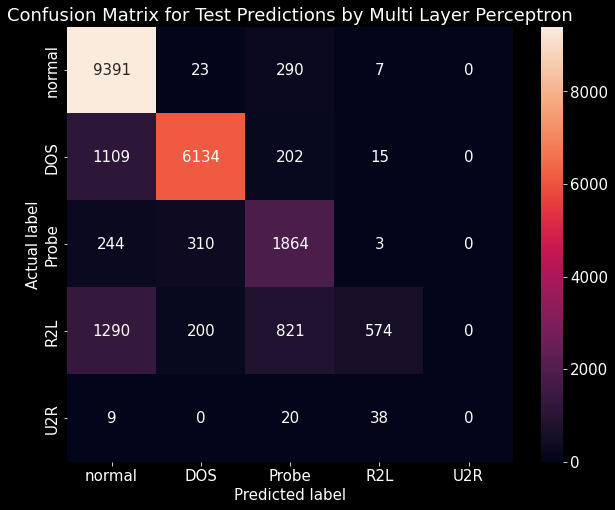

In [105]:
cm_mlp_multi = confusion_matrix(test_y_multi, mlp_pred_test, labels=[0,1,2,3,4])
with plt.style.context('dark_background'):
  plt.figure(figsize=(10,8))
  sns.heatmap(cm_mlp_multi, annot=True,  fmt='d', xticklabels = multi_classes, yticklabels = multi_classes )
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title('Confusion Matrix for Test Predictions by Multi Layer Perceptron')
  plt.show()

## Gradient Boosting Machine

#### using XGBoost Classifier

### Binary Classification

#### Tuning XGB Classifier's Hyper Parameters with Cross Validation

In [ ]:
xgbc_binary  = XGBClassifier(random_state=12345)

In [ ]:
fit_params = {'early_stopping_rounds':5, 
            'eval_metric' : 'error', 
            'eval_set':[(test_x_binary, test_y_binary)]}

In [ ]:
param_grid_xgbc_binary = {
    'n_estimators' : [20, , 50, 100, 150],
    'learning_rate' : [0.1, 0.3, 0.5, 0.7, 0.9]
    'max_depth' : [5, 10, 15, 20, 25]
}

In [ ]:
xgbc_binaryCV = GridSearchCV(xgbc_binary, param_grid=param_grid_xgbc_binary, cv=5, scoring='accuracy', n_jobs=-1, verbose=True)

In [ ]:
xgbc_binaryCV.fit(train_x_binary, train_y_binary, **fit_params)

In [ ]:
xgb

#### Tuned Parameters:
* n_estimators = 20
* learning_rate = 0.5
* max_depth = 15

In [107]:
xgbc_binary = XGBClassifier(random_state=12345, n_estimators=20, learning_rate=0.5, max_depth=15)

In [108]:
xgbc_binary.fit(train_x_binary, train_y_binary, eval_metric="error", eval_set=[(test_x_binary, test_y_binary)], verbose=True, early_stopping_rounds=5)

[0]	validation_0-error:0.227156
Will train until validation_0-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.227511
[2]	validation_0-error:0.227732
[3]	validation_0-error:0.227289
[4]	validation_0-error:0.227289
[5]	validation_0-error:0.227244
Stopping. Best iteration:
[0]	validation_0-error:0.227156



XGBClassifier(learning_rate=0.5, max_depth=15, n_estimators=20,
              random_state=12345)

In [109]:
print('Accuracy for Training :',accuracy_score(train_y_binary, xgbc_binary.predict(train_x_binary)),' | ', 'Accuracy for Testing :',accuracy_score(test_y_binary, xgbc_binary.predict(test_x_binary)))
acc_xgbc_binary = accuracy_score(test_y_binary, xgbc_binary.predict(test_x_binary))

Accuracy for Training : 0.9787732291840315  |  Accuracy for Testing : 0.7728442157558553


In [110]:
print('AUC for Training :',roc_auc_score(train_y_binary, xgbc_binary.predict_proba(train_x_binary)[:,1]),' | ', 'AUC for Testing :',roc_auc_score(test_y_binary, xgbc_binary.predict_proba(test_x_binary)[:,1]))
auc_xgbc_binary = roc_auc_score(test_y_binary, xgbc_binary.predict_proba(test_x_binary)[:,1])

AUC for Training : 0.9961616464332808  |  AUC for Testing : 0.7695668796102637


In [111]:
print(classification_report(test_y_binary, xgbc_binary.predict(test_x_binary), target_names=binary_classes))

              precision    recall  f1-score   support

      normal       0.66      0.97      0.79      9711
    abnormal       0.96      0.63      0.76     12833

    accuracy                           0.77     22544
   macro avg       0.81      0.80      0.77     22544
weighted avg       0.83      0.77      0.77     22544



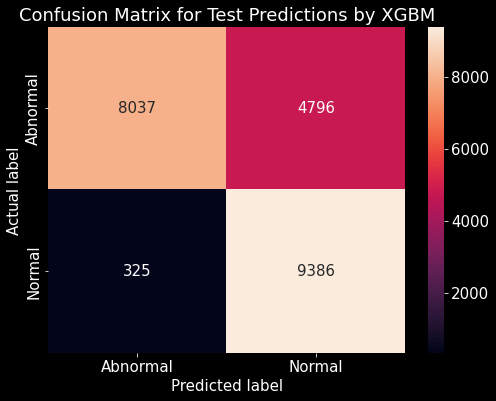

In [112]:
cm_xgbc_binary = confusion_matrix(test_y_binary, xgbc_binary.predict(test_x_binary), labels=[1,0])
with plt.style.context('dark_background'):
  plt.figure(figsize=(8,6))
  sns.heatmap(cm_xgbc_binary, annot=True,  fmt='d', xticklabels = ["Abnormal", "Normal"] , yticklabels = ["Abnormal", "Normal"] )
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title('Confusion Matrix for Test Predictions by XGBM')
  plt.show()

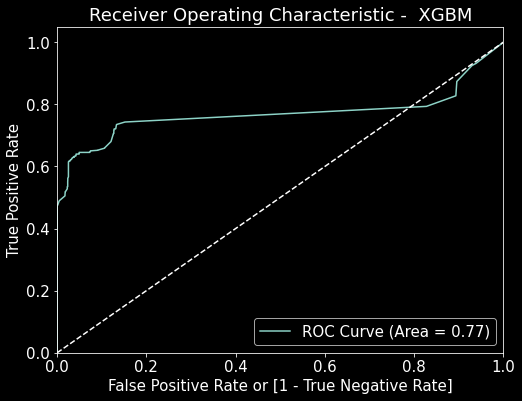

In [113]:
fpr, tpr, thresholds = roc_curve(test_y_binary, xgbc_binary.predict_proba(test_x_binary)[:,1], drop_intermediate = False )
with plt.style.context('dark_background'):
  plt.figure(figsize=(8, 6))
  plt.plot( fpr, tpr, label='ROC Curve (Area = %0.2f)' % roc_auc_score(test_y_binary, xgbc_binary.predict_proba(test_x_binary)[:,1]))
  plt.plot([0, 1], [0, 1], 'w--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic -  XGBM')
  plt.legend(loc="lower right")
  plt.show()

### Multi-Class Classification

#### UDF to tune XGB Classifier Model for F1-Score along with the Over-Fitting Curve Plot

In [115]:
def fit_model(**params):  
    model = XGBClassifier(random_state=12345, n_jobs=-1, **params).fit(train_x_multi, train_y_multi)
    train_f1 = f1_score(train_y_multi, model.predict(train_x_multi), average='weighted')
    val_f1 = f1_score(test_y_multi, model.predict(test_x_multi), average='weighted')
    return train_f1, val_f1

In [116]:
def fit_model_and_plot(param_name, param_values):
    train_scores, val_scores = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_f1, val_f1 = fit_model(**params)
        train_scores.append(train_f1)
        val_scores.append(val_f1)
    with plt.style.context('dark_background'):  
      plt.figure(figsize=(16,8))
      plt.title('Overfitting Curve: ' + param_name)
      plt.plot(param_values, train_scores, 'y-o')
      plt.plot(param_values, val_scores, 'r-o')
      plt.xlabel(param_name)
      plt.ylabel('F1-Score')
      plt.grid(False)
      plt.legend(['Training', 'Validation'])

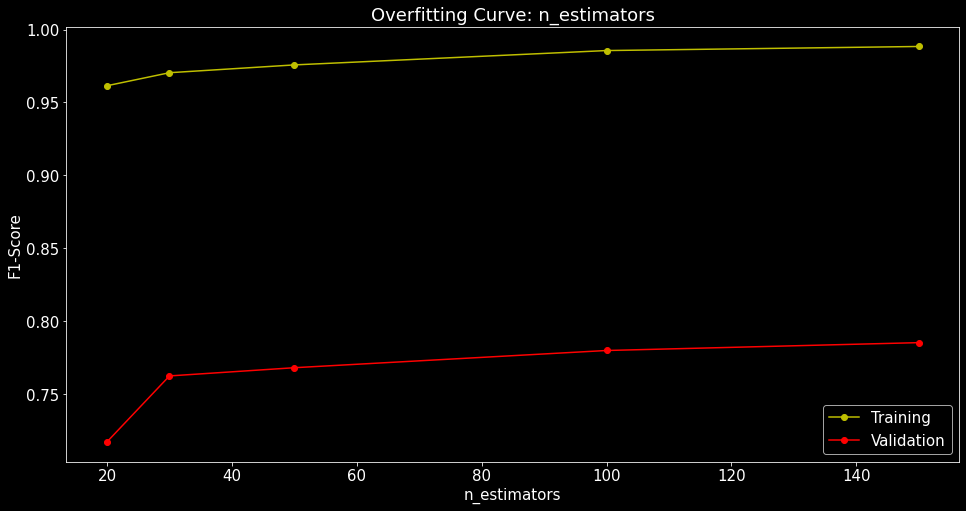

In [117]:
fit_model_and_plot('n_estimators', [20,30,50,100,150])

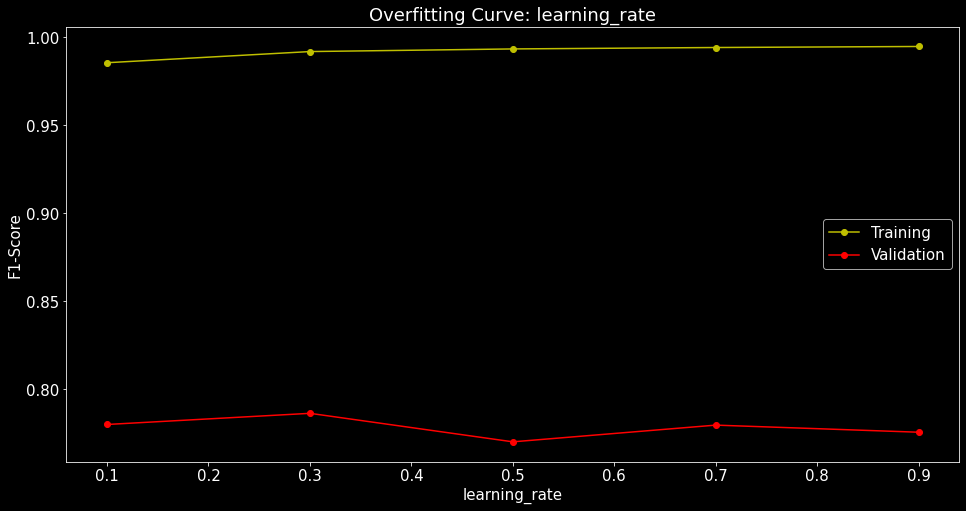

In [ ]:
fit_model_and_plot('learning_rate', [0.1,0.3,0.5,0.7,0.9])

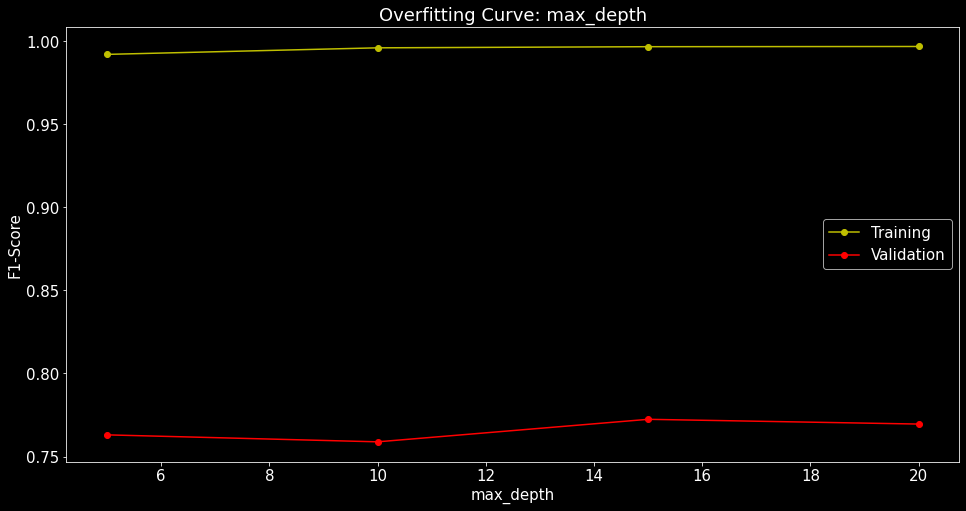

In [ ]:
fit_model_and_plot('max_depth', [5,10,15,20])

#### Tuned Parameters:
* n_estimators = 30
* learning_rate = 0.3
* max_depth = 15

In [131]:
xgbc_multi = XGBClassifier(n_estimators=30, learning_rate=0.3, max_depth=15, random_state=12345)

In [133]:
xgbc_multi.fit(train_x_multi, train_y_multi)

XGBClassifier(learning_rate=0.3, max_depth=15, n_estimators=30,
              objective='multi:softprob', random_state=12345)

In [120]:
print('Accuracy for Training :',accuracy_score(train_y_multi, xgbc_multi.predict(train_x_multi)),' | ', 'Accuracy for Testing :',accuracy_score(test_y_multi, xgbc_multi.predict(test_x_multi)))

Accuracy for Training : 0.9966738904368396  |  Accuracy for Testing : 0.7893009226401704


In [121]:
print('Cohen\'s Kappa for Training :',cohen_kappa_score(train_y_multi, xgbc_multi.predict(train_x_multi)),' | ', 'Cohen\'s Kappa for Testing :',cohen_kappa_score(test_y_multi, xgbc_multi.predict(test_x_multi)))
cohen_xgbc_multi = cohen_kappa_score(test_y_multi, xgbc_multi.predict(test_x_multi))

Cohen's Kappa for Training : 0.9941926052617883  |  Cohen's Kappa for Testing : 0.6714186314638777


In [122]:
print(classification_report(test_y_multi, xgbc_multi.predict(test_x_multi), target_names = multi_classes))

              precision    recall  f1-score   support

      normal       0.72      0.97      0.83      9711
         DOS       0.97      0.82      0.89      7460
       Probe       0.69      0.62      0.65      2421
         R2L       0.81      0.26      0.39      2885
         U2R       0.42      0.25      0.32        67

    accuracy                           0.79     22544
   macro avg       0.72      0.58      0.62     22544
weighted avg       0.81      0.79      0.77     22544



In [123]:
f1_xgbc_multi = f1_score(test_y_multi, xgbc_multi.predict(test_x_multi), average='weighted')

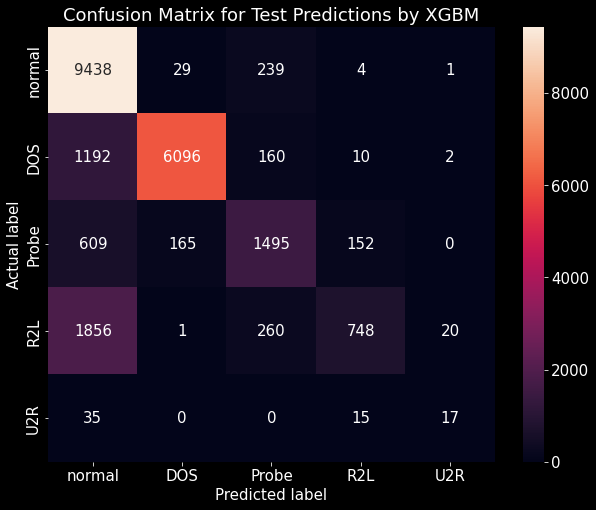

In [124]:
cm_xgbc_multi = confusion_matrix(test_y_multi, xgbc_multi.predict(test_x_multi), labels=[0,1,2,3,4])
with plt.style.context('dark_background'):
  plt.figure(figsize=(10,8))
  sns.heatmap(cm_xgbc_multi, annot=True,  fmt='d', xticklabels = multi_classes, yticklabels = multi_classes )
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title('Confusion Matrix for Test Predictions by XGBM')
  plt.show()

# Model Evaluation

The metrics, we are going to be using on Test Data to evaluate the Models are:
####For, Binary Classification :
* Accuracy - Since the Classes are pretty balanced.
* AUC - To compare the model predictive capabilities.

####For, Multi-Class Classification :
* Cohen's Kappa Coefficient - Since the Data is highly imbalanced, The Cohen's Kappa Score is like a supercharged version of accuracy which also integrates measurements of chance and class imbalance.
* F1-Score - It accounts for low values of both recall and precision.

### Binary Classification

In [129]:
pd.DataFrame({
    'Accuracy':[acc_logreg_binary, acc_lsvc_binary, acc_mlp_binary, acc_xgbc_binary],
    'AUC' : [auc_logreg_binary, auc_lsvc_binary, auc_mlp_binary, auc_xgbc_binary]
}, index=['Logistic Regression', 'Linear SVC', 'MLP', 'XGBC'])

,Accuracy,AUC
Logistic Regression,0.747028,0.862912
Linear SVC,0.768497,0.879693
MLP,0.782647,0.830863
XGBC,0.772844,0.769567


**Conclusion** : There is a tie between two models i.e. Linear SVC and MLP to be a potential candidate for the Best Binary Classification Model in this case. As there is a trade-off between Accuracy and AUC while switching from one of the two models to the another. We will go for the **LInear Support Vector Classifier** as it gave the highest AUC along with a decent Accuracy score.

#### Feature Importance for Binary Classification using Linear SVC

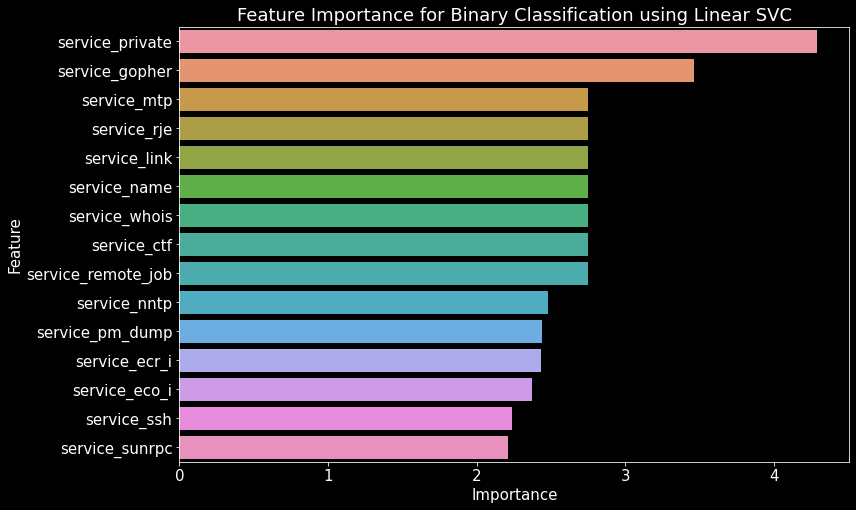

In [151]:
f_importance_df_binary = pd.DataFrame({
    'Feature':lsvc_binary.feature_names_in_,
    'Importance':lsvc_binary.coef_.ravel()
}).sort_values('Importance', ascending=False)
with plt.style.context('dark_background'):
  plt.figure(figsize=(12,8))
  sns.barplot(data=f_importance_df_binary.head(15), x='Importance', y='Feature')
  plt.title('Feature Importance for Binary Classification using Linear SVC')
  

### Multi-Class Classification

In [130]:
pd.DataFrame({
    'Cohen\'s Kappa':[cohen_logreg_multi, cohen_lsvc_multi, cohen_mlp_multi, cohen_xgbc_multi],
    'F1-Score':[f1_logreg_multi, f1_lsvc_multi, f1_mlp_multi, f1_xgbc_multi]
}, index=['Logistic Regression', 'Linear SVC', 'MLP', 'XGBC'])

,Cohen's Kappa,F1-Score
Logistic Regression,0.656103,0.762108
Linear SVC,0.655903,0.758507
MLP,0.688904,0.772246
XGBC,0.671419,0.770699


**Conclusion** : Clearly, The **Multi Layer Perceptron** is the winner here with highest Cohen's Kappa Score and F1-Score as well.

#### Feature Importance for Multi-Class Classification using XGBClassifier
Since, There is still no support to extract feature importance from keras sequential models, We are going to be using XGBClassifier which is the second best model to extract and visualize the feature importance.

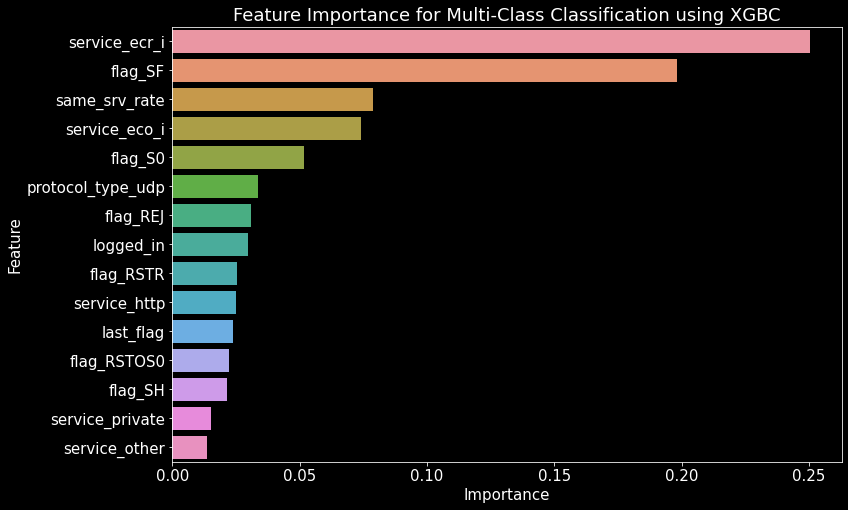

In [180]:
f_importance_df_multi = pd.DataFrame({
    'Feature': test_x_multi.columns,
    'Importance':xgbc_multi.feature_importances_
}).sort_values(by='Importance', ascending=False)
with plt.style.context('dark_background'):  
  plt.figure(figsize=(12,8))
  sns.barplot(data=f_importance_df_multi.head(15), y='Feature', x='Importance', orient='h')
  plt.title('Feature Importance for Multi-Class Classification using XGBC')